In [35]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [36]:
class NeuralNetwork:
    def __init__(self, learning_rate, epochs, batch_size, high):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.high = high
        self.weights = np.random.uniform(low=-self.high, high=self.high, size=(28*28, 10))
        self.take_dataset()

    def take_dataset(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
        self.x_train = self.x_train.reshape(-1, 28*28) / 255.0
        self.x_test = self.x_test.reshape(-1, 28*28) / 255.0

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def predict(self, x):
        return np.argmax(self.softmax(np.dot(x, self.weights)), axis=1)

    def plot_neurons(self):
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        for i, ax in enumerate(axes.flat):
            ax.imshow(self.weights[:, i].reshape((28, 28)), cmap='gray')
            ax.set_title(f'Neuron {i}')
            ax.axis('off')
        plt.show()


    def train(self):
        num_batches = self.x_train.shape[0] // self.batch_size
        for epoch in range(self.epochs):
            for batch in range(num_batches):
                batch_indices = np.random.choice(self.x_train.shape[0], self.batch_size)
                x_batch, y_batch = self.x_train[batch_indices], self.y_train[batch_indices]
                logits = np.dot(x_batch, self.weights)
                probs = self.softmax(logits)
                error = probs - np.eye(10)[y_batch]
                grad = np.dot(x_batch.T, error) / self.batch_size
                self.weights -= self.learning_rate * grad
            if (epoch+1)% 25 == 0  or epoch == 0:
                train_preds = self.predict(self.x_train)
                train_acc = np.mean(train_preds == self.y_train)
                test_preds = self.predict(self.x_test)
                test_acc = np.mean(test_preds == self.y_test)
                print(f'Epoch: {epoch+1}/{self.epochs}\tTrain accuracy {round(train_acc*100,2)}%\tTest accuracy: {round(test_acc*100,2)}%')
    
    def test(self):
        # Создание пустого списка индексов
        sample_indices = []
    
        # Выбор по одному случайному индексу для каждой цифры от 0 до 9
        for digit in range(10):
            # Получение всех индексов изображений с данной цифрой в качестве метки
            indices = np.where(self.y_test == digit)[0]
            # Выбор случайного индекса
            index = np.random.choice(indices)
            # Добавление индекса в список
            sample_indices.append(index)
    
        # Получение предсказаний для выбранных индексов
        layer_output = np.dot(self.x_test[sample_indices], self.weights)
        softmax_output = np.exp(layer_output) / np.sum(np.exp(layer_output), axis=1, keepdims=True)
        predictions = np.argmax(softmax_output, axis=1)
    
        # Отображение выбранных изображений и их предсказаний
        fig, axes = plt.subplots(2, 10, figsize=(15, 4))
        for i, index in enumerate(sample_indices):
            axes[0, i].imshow(self.x_test[index].reshape((28, 28)), cmap='gray')
            axes[0, i].axis('off')
            axes[0, i].set_title(f'True Label: {self.y_test[index]}')
            axes[1, i].bar(range(10), softmax_output[i])
            axes[1, i].set_xticks(range(10))
            axes[1, i].set_title(f'Prediction: {predictions[i]}')
        plt.show()
    

In [37]:
nn = NeuralNetwork(0.5, 100, 1000, 0.003)
nn.train()

Epoch: 1/100	Train accuracy 88.24%	Test accuracy: 89.01%
Epoch: 25/100	Train accuracy 92.11%	Test accuracy: 92.15%
Epoch: 50/100	Train accuracy 92.64%	Test accuracy: 92.41%
Epoch: 75/100	Train accuracy 92.83%	Test accuracy: 92.55%
Epoch: 100/100	Train accuracy 92.95%	Test accuracy: 92.59%


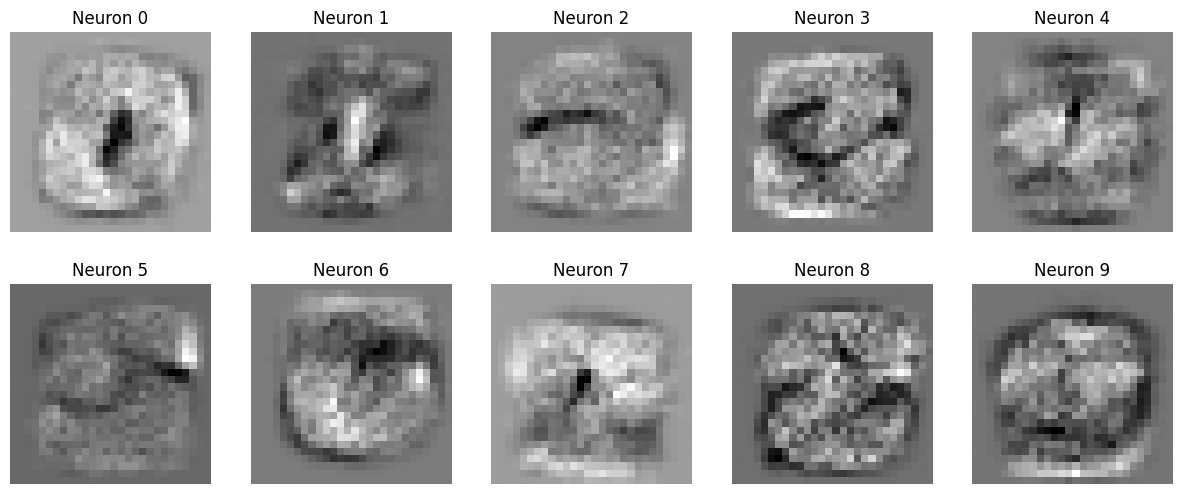

In [38]:
nn.plot_neurons()

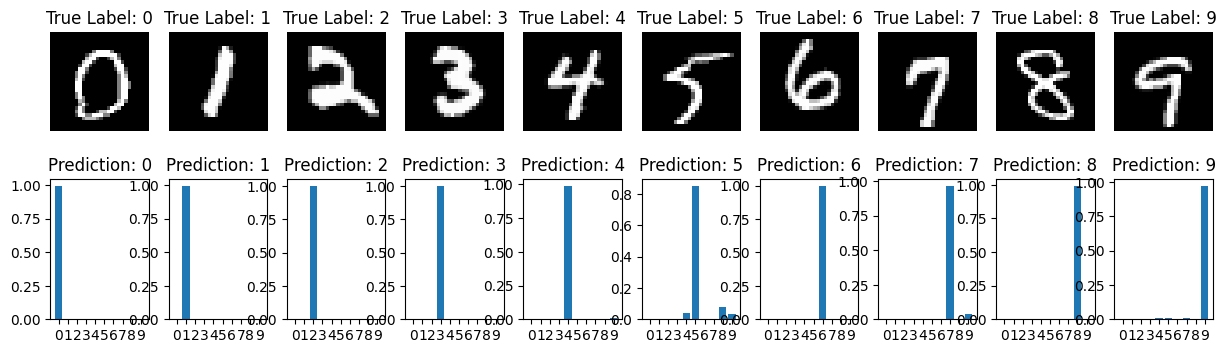

In [42]:
nn.test()